In [162]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA
from numpy import linalg as LA
from tqdm import *
import math as math
import xgboost as xgb 
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [163]:
#df = pd.read_excel('CSCO_5DAY.xlsx')
df = pd.read_excel('5DAYS_BMW.xlsx')

In [164]:
#Discard rows and columns containing null values
df = df.dropna(how='any')

In [165]:
#sort by date
#df = df.sort_values(by='date')
df = df.sort_values(by='DATE')

In [166]:
#choose_factor = [i for i in df.columns if i not in ['date','CLOSETOMORROW','ZSPREADTOMORROW']]
choose_factor = [i for i in df.columns if i not in ['DATE','ZSPREADTOMORROW']]

In [167]:
choose_feature = df[choose_factor]

In [168]:
choose_feature

,OPEN0,HIGH0,LOW0,CLOSE0,YTM0,ZSPREAD0,OPEN1,HIGH1,LOW1,CLOSE1,...,LOW3,CLOSE3,YTM3,ZSPREAD3,OPEN4,HIGH4,LOW4,CLOSE4,YTM4,ZSPREAD4
0,100.806,101.111,100.772,101.103,0.050,34.947,100.559,100.830,100.545,100.806,...,100.143,100.265,0.392,71.541,100.131,100.172,100.096,100.142,0.442,74.267
1,101.092,101.282,101.092,101.249,-0.010,30.000,100.806,101.111,100.772,101.103,...,100.229,100.551,0.275,56.983,100.143,100.274,100.143,100.265,0.392,71.541
2,101.245,101.258,101.064,101.066,0.064,36.384,101.092,101.282,101.092,101.249,...,100.545,100.806,0.171,46.909,100.269,100.581,100.229,100.551,0.275,56.983
3,101.075,101.084,100.954,100.975,0.101,39.702,101.245,101.258,101.064,101.066,...,100.772,101.103,0.050,34.947,100.559,100.830,100.545,100.806,0.171,46.909
4,100.968,100.998,100.808,100.826,0.160,47.500,101.075,101.084,100.954,100.975,...,101.092,101.249,-0.010,30.000,100.806,101.111,100.772,101.103,0.050,34.947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,101.284,101.290,101.276,101.289,-0.429,6.658,101.286,101.288,101.275,101.286,...,101.277,101.285,-0.417,6.745,101.288,101.289,101.282,101.285,-0.415,6.929
277,101.288,101.289,101.272,101.284,-0.427,6.463,101.284,101.290,101.276,101.289,...,101.265,101.288,-0.421,7.008,101.285,101.287,101.277,101.285,-0.417,6.745
278,101.284,101.302,101.273,101.300,-0.440,5.414,101.288,101.289,101.272,101.284,...,101.275,101.286,-0.425,6.731,101.285,101.292,101.265,101.288,-0.421,7.008
279,101.298,101.302,101.285,101.296,-0.439,5.526,101.284,101.302,101.273,101.300,...,101.276,101.289,-0.429,6.658,101.286,101.288,101.275,101.286,-0.425,6.731


In [169]:
choose_label = df['ZSPREADTOMORROW']

In [170]:
#x_train = choose_feature.tail(200)
#y_train = choose_label.tail(200)

#x_test = choose_feature.head(80)
#y_test = choose_label.head(80)

x_train,x_test,y_train,y_test=train_test_split(choose_feature,choose_label,test_size=0.2,random_state=1)

In [171]:
## random forest
x_train

,OPEN0,HIGH0,LOW0,CLOSE0,YTM0,ZSPREAD0,OPEN1,HIGH1,LOW1,CLOSE1,...,LOW3,CLOSE3,YTM3,ZSPREAD3,OPEN4,HIGH4,LOW4,CLOSE4,YTM4,ZSPREAD4
58,101.294,101.297,101.263,101.271,-0.068,35.589,101.365,101.366,101.279,101.290,...,101.354,101.376,-0.112,33.631,101.389,101.423,101.379,101.393,-0.119,32.118
163,101.366,101.382,101.351,101.377,-0.253,26.688,101.410,101.416,101.361,101.370,...,101.413,101.419,-0.270,25.899,101.454,101.461,101.432,101.435,-0.277,25.382
34,101.421,101.447,101.401,101.402,-0.103,30.487,101.331,101.432,101.328,101.414,...,101.113,101.211,-0.018,37.453,101.100,101.173,101.100,101.129,0.017,41.114
51,101.371,101.398,101.354,101.379,-0.109,31.081,101.345,101.379,101.328,101.372,...,101.349,101.374,-0.103,30.817,101.431,101.438,101.378,101.384,-0.107,31.419
157,101.446,101.473,101.421,101.470,-0.294,23.784,101.426,101.453,101.426,101.450,...,101.411,101.437,-0.271,25.312,101.433,101.457,101.425,101.446,-0.274,25.138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,101.296,101.321,101.295,101.319,-0.287,22.089,101.302,101.305,101.281,101.295,...,101.303,101.306,-0.273,23.271,101.296,101.314,101.292,101.306,-0.272,22.801
255,101.334,101.335,101.319,101.332,-0.407,8.803,101.333,101.339,101.329,101.333,...,101.321,101.334,-0.400,9.154,101.325,101.336,101.315,101.332,-0.397,9.123
72,101.390,101.396,101.371,101.371,-0.128,34.241,101.382,101.413,101.381,101.388,...,101.310,101.314,-0.099,34.957,101.407,101.421,101.367,101.375,-0.125,34.067
235,101.372,101.375,101.363,101.366,-0.384,11.158,101.373,101.376,101.361,101.372,...,101.296,101.358,-0.371,12.651,101.349,101.362,101.334,101.359,-0.371,12.745


In [172]:
# from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [173]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train a random forest to solve regression problems
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=200)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

# Evaluate regression performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score of random forest model：\n",r2_score(y_test,y_pred))

Mean Absolute Error: 1.211396052631581
Mean Squared Error: 5.286671121439946
Root Mean Squared Error: 2.299276216864765
R^2 Score of random forest model：
 0.969182258326457


In [174]:
importances = forest.feature_importances_ 
importances_df = pd.DataFrame([choose_factor, importances], index=['Features', 'Importances']).T
importances_df.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
5,ZSPREAD0,0.292249
4,YTM0,0.198162
10,YTM1,0.0724484
16,YTM2,0.0639588
11,ZSPREAD1,0.0638265
29,ZSPREAD4,0.0436459
3,CLOSE0,0.0427083
17,ZSPREAD2,0.041655
28,YTM4,0.0408463
1,HIGH0,0.0392401


In [175]:
plots = pd.DataFrame(y_pred,y_test).reset_index()

In [176]:
plots.columns = ['true','predict']

<AxesSubplot:>

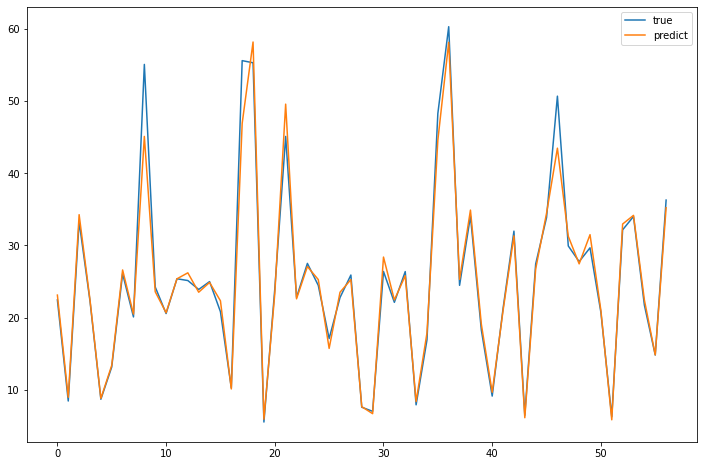

In [177]:
plots.plot(figsize=(12,8))

In [178]:
## LinearRegression

In [179]:
from sklearn.linear_model import LinearRegression  # 线性回归
linearmodel = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linearmodel.fit(x_train,y_train)   # 线性回归建模
predicted = linearmodel.predict(x_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R^2 Score of linear model：\n",r2_score(y_test,predicted))

Mean Absolute Error: 1.381582576493191
Mean Squared Error: 17.4820571249835
Root Mean Squared Error: 4.181154998918779
R^2 Score of linear model：
 0.8980913493531029


<AxesSubplot:>

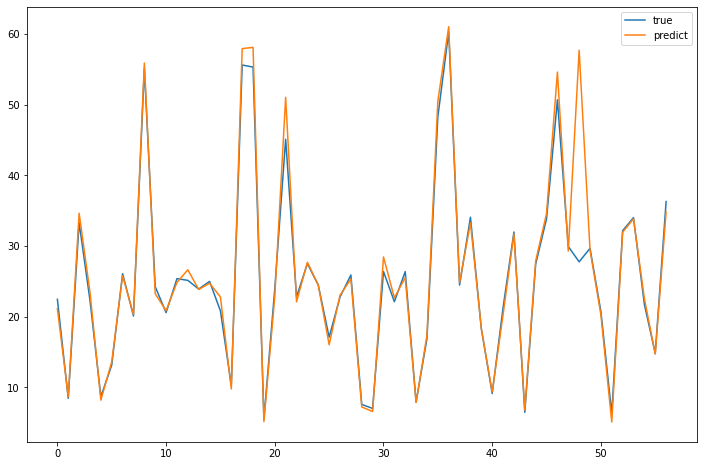

In [180]:
plots = pd.DataFrame(predicted,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))


In [181]:
##ridge model

In [182]:
from sklearn.linear_model import Ridge
ridgemodel = Ridge(alpha=10)
ridgemodel.fit(x_train,y_train)   # 岭回归建模
ridge_pred = ridgemodel.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("R^2 Score of ridge model：\n",r2_score(y_test,ridge_pred))

Mean Absolute Error: 0.930902397404875
Mean Squared Error: 1.8308188101477187
Root Mean Squared Error: 1.353077532940267
R^2 Score of ridge model：
 0.989327556065786


<AxesSubplot:>

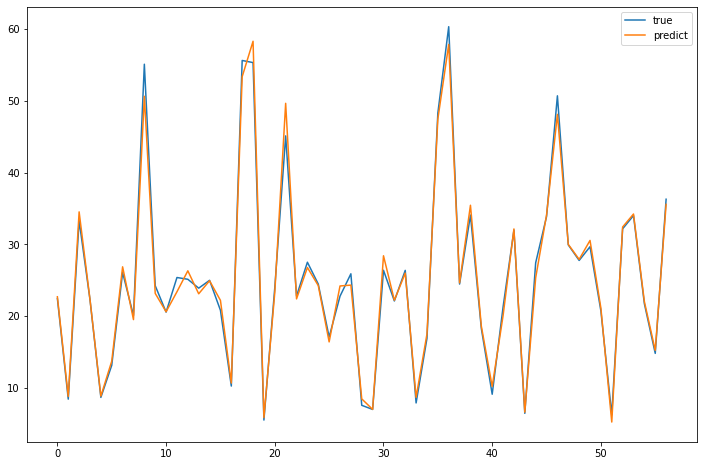

In [183]:
plots = pd.DataFrame(ridge_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [184]:
#KNN

In [185]:
from sklearn import neighbors
KNN_model = neighbors.KNeighborsRegressor()
KNN_model.fit(x_train,y_train)
KNN_pred = KNN_model.predict(x_test)

print('Mean Absolute Error of KNN_model:', metrics.mean_absolute_error(y_test, KNN_pred))
print('Mean Squared Error of KNN_model:', metrics.mean_squared_error(y_test, KNN_pred))
print('Root Mean Squared Error of KNN_model:',np.sqrt(metrics.mean_squared_error(y_test, KNN_pred)))
print("R^2 Score of KNN model：",r2_score(y_test,KNN_pred))

Mean Absolute Error of KNN_model: 1.2823754385964918
Mean Squared Error of KNN_model: 3.737594354385967
Root Mean Squared Error of KNN_model: 1.9332858956672618
R^2 Score of KNN model： 0.978212335390633


<AxesSubplot:>

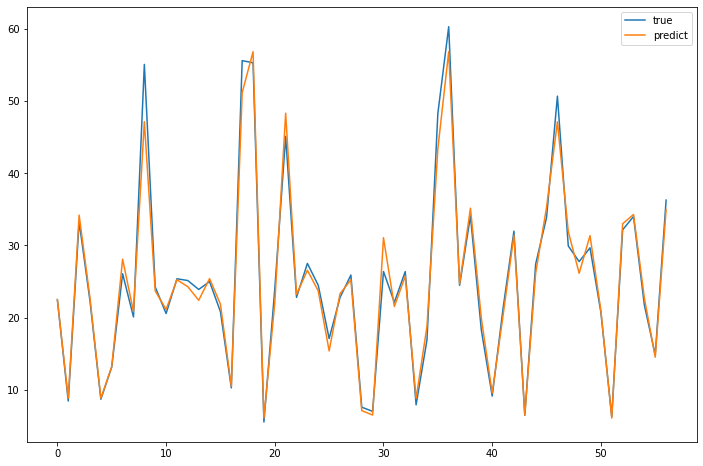

In [186]:
plots = pd.DataFrame(KNN_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [187]:
#SVM

In [188]:
from sklearn.svm import SVR
#线性核函数 Linear kernel function
lin_svr = SVR(kernel='linear')
lin_svr.fit(x_train,y_train)
lin_svr_pred=lin_svr.predict(x_test)
print('Mean Absolute Error of lin_svr:', metrics.mean_absolute_error(y_test, lin_svr_pred))
print('Mean Squared Error of lin_svr:', metrics.mean_squared_error(y_test, lin_svr_pred))
print('Root Mean Squared Error of lin_svr:',np.sqrt(metrics.mean_squared_error(y_test, lin_svr_pred)))
print("R^2 Score of lin_svr：\n",r2_score(y_test,lin_svr_pred))

#多项式核函数 Polynomial kernel function
poly_svr = SVR(kernel='poly')
poly_svr.fit(x_train,y_train)
poly_svr_pred=poly_svr.predict(x_test)
print('Mean Absolute Error of poly_svr:', metrics.mean_absolute_error(y_test, poly_svr_pred))
print('Mean Squared Error of poly_svr:', metrics.mean_squared_error(y_test, poly_svr_pred))
print('Root Mean Squared Error of poly_svr:',np.sqrt(metrics.mean_squared_error(y_test, poly_svr_pred)))
print("R^2 Score of poly_svr：\n",r2_score(y_test,poly_svr_pred))

#径向基核函数 Radial basis kernel function
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(x_train,y_train)
rbf_svr_pred=rbf_svr.predict(x_test)
print('Mean Absolute Error of rbf_svr:', metrics.mean_absolute_error(y_test, rbf_svr_pred))
print('Mean Squared Error of rbf_svr:', metrics.mean_squared_error(y_test, rbf_svr_pred))
print('Root Mean Squared Error of rbf_svr:',np.sqrt(metrics.mean_squared_error(y_test, rbf_svr_pred)))
print("R^2 Score of rbf_svr：\n",r2_score(y_test,rbf_svr_pred))

Mean Absolute Error of lin_svr: 0.7595522183541468
Mean Squared Error of lin_svr: 1.5121238410366264
Root Mean Squared Error of lin_svr: 1.2296844477493512
R^2 Score of lin_svr：
 0.9911853336738715
Mean Absolute Error of poly_svr: 4.571787640058413
Mean Squared Error of poly_svr: 29.718209183922067
Root Mean Squared Error of poly_svr: 5.45144101902626
R^2 Score of poly_svr：
 0.8267628016586416
Mean Absolute Error of rbf_svr: 2.6506952143757285
Mean Squared Error of rbf_svr: 25.681434897821983
Root Mean Squared Error of rbf_svr: 5.067685358999904
R^2 Score of rbf_svr：
 0.8502944843159786


<AxesSubplot:>

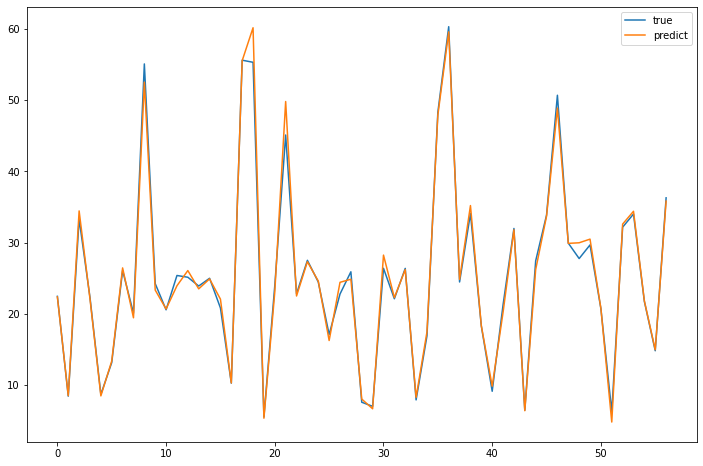

In [189]:
plots = pd.DataFrame(lin_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

<AxesSubplot:>

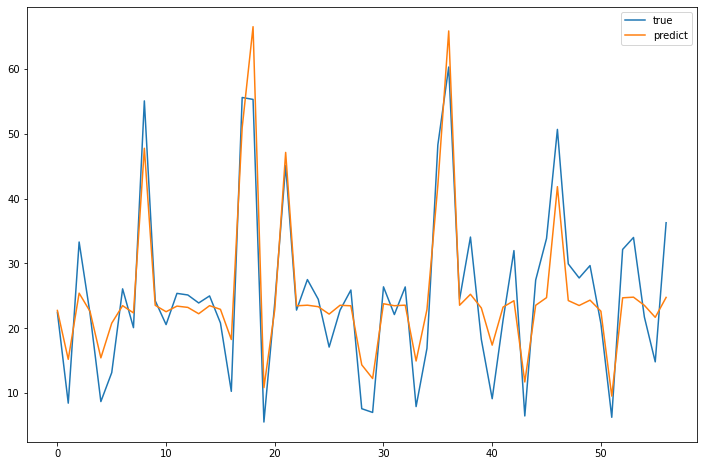

In [190]:
plots = pd.DataFrame(poly_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

<AxesSubplot:>

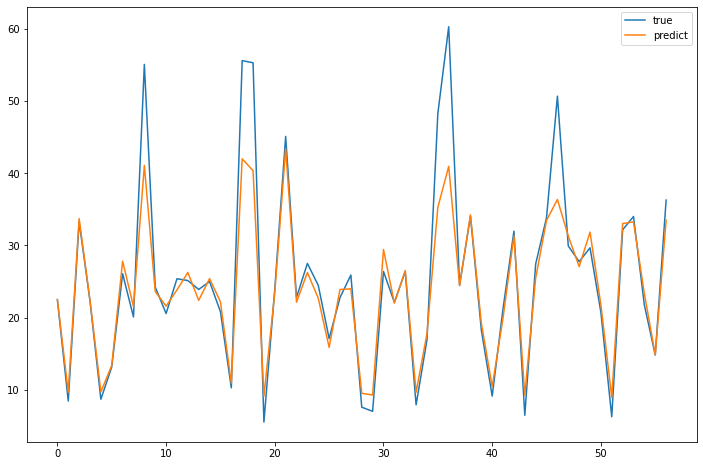

In [191]:
plots = pd.DataFrame(rbf_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [192]:
CSCO = pd.read_excel('CSCO_5DAY.xlsx')
#CSCO = df.dropna(how='any')
#CSCO = df.sort_values(by='date')
MSFT = pd.read_excel('MSFT_5DAY.xlsx')
#MSFT = df.dropna(how='any')
#MSFT = df.sort_values(by='date')
AAPL = pd.read_excel('AAPL_5DAY.xlsx')
#AAPL = df.sort_values(by='date')
#AAPL = df.dropna(how='any')

In [193]:
COMB = pd.concat([CSCO,MSFT,AAPL])

In [194]:
#COMB.to_excel("COMB_5DAY.xlsx")

In [195]:
#ANN

In [196]:
from sklearn.neural_network import MLPClassifier
ANN=MLPClassifier()
ANN.fit(x_train,y_train.astype('int'))
ANN_pred=ANN.predict(x_test)

print('Mean Absolute Error of ANN_model:', metrics.mean_absolute_error(y_test, ANN_pred))
print('Mean Squared Error of ANN_model:', metrics.mean_squared_error(y_test, ANN_pred))
print('Root Mean Squared Error of ANN_model:',np.sqrt(metrics.mean_squared_error(y_test, ANN_pred)))
print("R^2 Score of ANN model：",r2_score(y_test,ANN_pred))

Mean Absolute Error of ANN_model: 1.9317894736842105
Mean Squared Error of ANN_model: 7.8753418947368425
Root Mean Squared Error of ANN_model: 2.8063039562272727
R^2 Score of ANN model： 0.9540920464829812


<AxesSubplot:>

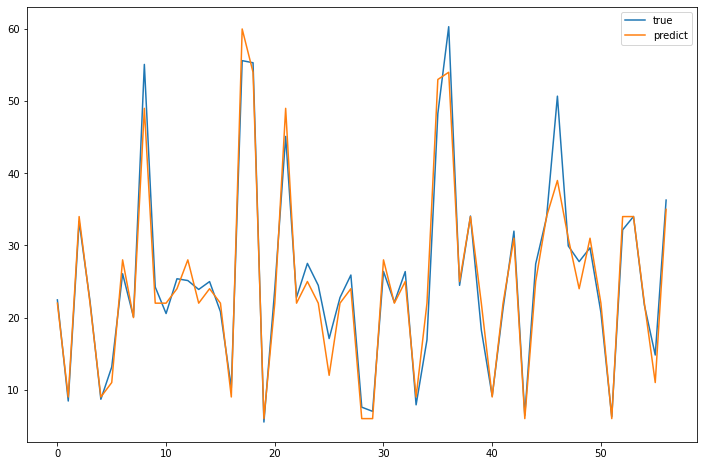

In [197]:
plots = pd.DataFrame(ANN_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [198]:
#ARIMA

In [199]:
#from statsmodels.tsa.arima.model import ARIMA
#ARIMA_MODEL = ARIMA(df,order=(5,1,0))
#ARIMA_MODEL = ARIMA_MODEL.fit(x_train,y_train)

In [200]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([
     ('RF', forest),
     ('Linearmodel', linearmodel),
     ('ridgemodel',ridgemodel),
     ('KNN',KNN_model),
    #('ANN',ANN),
     ('lin_svr',lin_svr)
 ])

er.fit(x_train, y_train)
er_pred = er.predict(x_test)

print('Mean Absolute Error of voting regression:', metrics.mean_absolute_error(y_test, er_pred))
print('Mean Squared Error of voting regression:', metrics.mean_squared_error(y_test, er_pred))
print('Root Mean Squared Error of voting regression:',np.sqrt(metrics.mean_squared_error(y_test, er_pred)))
print("R^2 Score of voting regression：",r2_score(y_test,er_pred))

Mean Absolute Error of voting regression: 0.9380663202184256
Mean Squared Error of voting regression: 2.3076992572188226
Root Mean Squared Error of voting regression: 1.5191113379929801
R^2 Score of voting regression： 0.9865476633716103


<AxesSubplot:>

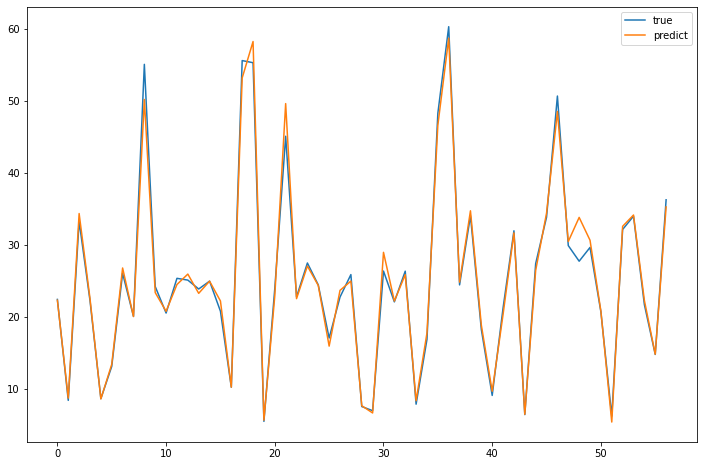

In [201]:
plots = pd.DataFrame(er_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))